# TPs Optimisation
Hamza OUKADDI

TSIORY RAZANAKOTO

SOUFIAN BARKATI

# TP1: Méthodes de gradient

Le TP en question a pour finalité d'apprendre à mettre en œuvre et à évaluer l'efficacité de l'algorithme du gradient en utilisant deux méthodes : une méthode avec pas fixe (GF) et une méthode avec pas optimale (GO).

### Importation des librairies

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modiifcation du style des graphiques
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

Afin de pouvoir implémenter et valider les deux méthodes, il nous faut définir les fonctions $J_1$, $J_2$ et $J_R$. 


$$J_{1}(v) = \sum_{i=1}^{N} (v_i-1)^2$$

$$J_{2}(v) = \sum_{i=1}^{N} (v_i-i)^2$$

$$J_{R}(v) = \sum_{i=1}^{N-1} ((v_{i+1} - v_i^2)^2 + (v_i-1)^2)$$



## Etape 1: Définition des fonctions de descente de gradient

Rappelons les algorithmes de descente GF et GO:

- **Gradient à pas fixe**:
  
  On suppoe que la fonction cout $J$ est $\alpha$-convexe sur $\mathbb{R}^N$ et que son gradient est $L$-Lipschitzien.
  
  Soit un vecteur initial $u_0\in \mathbb{R}^N$ et un pas $t > 0$ fixé. Pour $k\geq 0$, on définit $u_{k+1} = u_k - t \nabla J(u_k)$. 

  L'algorithme converge lorsque le pas est $0\lt t\lt\dfrac{2\alpha}{L^2}$ et s'arrête lorsque $\|\nabla J(u_k)\| \leq \epsilon$ où $\epsilon$ est une tolérance donnée.

- **Gradient à pas optimal**:

  On suppoe que la fonction cout $J$ est $\alpha$-convexe sur $\mathbb{R}^N$, G-différentiable et que son gradient est $L$-Lipschitzien.
  
  Soit un vecteur initial $u_0\in \mathbb{R}^N$ et un pas $t > 0$ fixé. Pour $k\geq 0$, on définit: 
  $$\min J(u_k-t\nabla J(u_k))\rightarrow t=t_{opt}\gt0$$
  $$u_{k+1} = u_k - t_{opt} \nabla J(u_k)$$



## Etape 2: Implémentation des algorithmes de descente, des fonctions $J_1$, $J_2$, $J_R$ et de leurs gradients

In [28]:
def GF(u0,fct,grad,eps,itt,t):
    k=0
    u1=np.copy(u0-t*grad(u0))
    U = [u0]
    while (k<=itt) and (abs(fct(u1)-fct(u0))>eps) :
        u0=u1
        u1=np.copy(u0-t*grad(u0))
        k+=1
        U.append(u1)
    return U,k

def GV(uk,fct,grad,eps,itt,t0):
    k=0
    try:
        c=fct(uk,eps)
        b=-np.dot(grad(uk,eps).T,grad(uk,eps))
        f_t=fct(uk-t0*grad(uk,eps),eps)
        a=(f_t-b*t0-c)/((t0)**2)
        t_k=-b/(2*a)
        f_t_k=fct(uk-t_k*grad(uk,eps),eps)
        while (k<=itt) and (abs(f_t_k-f_t)>eps):
            k+=1
            f_t=f_t_k
            a=(f_t-b*t0-c)/((t0)**2)
            t_k=-b/(2*a)
            f_t_k=fct(uk-t_k*grad(uk,eps),eps)
    except:
        c=fct(uk)
        b=-np.dot(grad(uk).T,grad(uk))
        f_t=fct(uk-t0*grad(uk))
        a=(f_t-b*t0-c)/((t0)**2)
        t_k=-b/(2*a)
        f_t_k=fct(uk-t_k*grad(uk))
        while (k<=itt) and (abs(f_t_k-f_t)>eps):
            k+=1
            f_t=f_t_k
            a=(f_t-b*t0-c)/((t0)**2)
            t_k=-b/(2*a)
            f_t_k=fct(uk-t_k*grad(uk))    
    return t_k


def GO(u0,fct,grad,eps,itt,t):
    k=0
    U=[u0]
    g_t=GV(u0,fct,grad,eps,itt,t)
    u1=np.copy(u0-g_t*grad(u0))
    while (k<=itt) and (abs(fct(u1)-fct(u0))>eps):
        u0=u1
        g_t=GV(u0,fct,grad,eps,itt,g_t)
        u1=np.copy(u0-g_t*grad(u0))
        k+=1
        U.append(u1)
    return U,k
        

Dans tous ces algorithmes, on conserve l'historique des valeurs de $u$ et on retourne une liste de vecteurs $u_k$ ainsi que le nombre d'itérations effectuées $k$.

On definit maintenant les fonctions $J_1$, $J_2$, $J_R$ et leurs gradients.

In [29]:
def J1(v) :
    s=0
    for i in range(len(v)):
        s+=(v[i]-1)**2
    return s

def J2 (v):
    s=0
    for i in range(len(v)):
        s+=(v[i]-(i+1))**2
    return s
    
def JR (v):
        s=0
        for i in range(len(v)-1):
            s+=(v[i]-1)**2+(v[i+1]-v[i]**2)**2
        return s

In [30]:
def grad_J1(v):
    return (2*(v-1))

def grad_J2(v):
    d_v=np.copy(v)  # copier le vecteur v pour preserver la valeur de v
    for i in range(len(v)):
            d_v[i]=2*(v[i]-(i+1))
    return d_v
    
def grad_JR(v):
    n=len(v)
    d_v=np.copy(v) # copier le vecteur v pour preserver la valeur de v
    d_v[0]=4*v[0]*(v[0]**2-v[1])+2*(v[0]-1)
    d_v[n-1]=2*(v[n-1]-v[n-2]**2)
    for i in range(1,n-1):
            d_v[i] = 4*v[i]*(v[i]**2-v[i+1])+2*(v[i]-v[i-1]**2)+2*(v[i]-1)
    return d_v

## Etape 3: Tests de validation de GF

In [31]:
N= [10,20,40]




print("==== Pour t = 1")
for i in N:
    v0=np.zeros(i)
    print(f"-N= {i}: GF sur J1, nombre d'itteration est {GF(v0,J1,grad_J1,1e-10,i,1)[1]}, le minimum est atteint en {GF(v0,J1,grad_J1,1e-10,i,1)[0][-1]}, sa valeur est {J1(GF(v0,J1,grad_J1,1e-10,1000,1)[0][-1])}")

print("---")    
for i in N:
    v0=np.zeros(i)
    print(f"-N= {i}: GF sur J2, nombre d'itteration est {GF(v0,J2,grad_J2,1e-10,i,1)[1]}, le minimum est atteint en {GF(v0,J2,grad_J2,1e-10,i,1)[0][-1]}, sa valeur est {J2(GF(v0,J2,grad_J2,1e-10,1000,1)[0][-1])}")

print("==== Pour t = 0.5")
for i in N:
    v0=np.zeros(i)
    print(f"-N= {i}: GF sur J1, nombre d'itteration est {GF(v0,J1,grad_J1,1e-10,i,0.5)[1]}, le minimum est atteint en {GF(v0,J1,grad_J1,1e-10,i,0.5)[0][-1]}, sa valeur est {J1(GF(v0,J1,grad_J1,1e-10,1000,0.5)[0][-1])}")

print("---")    
for i in N:
    v0=np.zeros(i)
    print(f"-N= {i}: GF sur J2, nombre d'itteration est {GF(v0,J2,grad_J2,1e-10,i,0.5)[1]}, le minimum est atteint en {GF(v0,J2,grad_J2,1e-10,i,0.5)[0][-1]}, sa valeur est {J2(GF(v0,J2,grad_J2,1e-10,1000,0.5)[0][-1])}")




==== Pour t = 1
-N= 10: GF sur J1, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur est 10.0
-N= 20: GF sur J1, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur est 20.0
-N= 40: GF sur J1, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur est 40.0
---
-N= 10: GF sur J2, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur est 385.0
-N= 20: GF sur J2, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur est 2870.0
-N= 40: GF sur J2, nombre d'itteration est 0, le minimum est atteint en [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sa valeur 

On remaque que pour un pas de 1, l'algorithme GF converge dès la première itération. On peut donc conclure que le pas est trop grand (condition $0\lt t \lt \frac{2\alpha}{L^2}$). en revanche, pour un pas de 0.5, l'algorithme converge en 2 itérations et vers le bon minimum qui est 0, puisque ce sont des fonctions positives. Pour $J_1$ le minimum est en vecteur $(1,1,....,1)$ et pour $J_2$ le minimum est en vecteur $(1,2,3,....,N)$.

## Etape 4: Construction de l'approximation parabolique

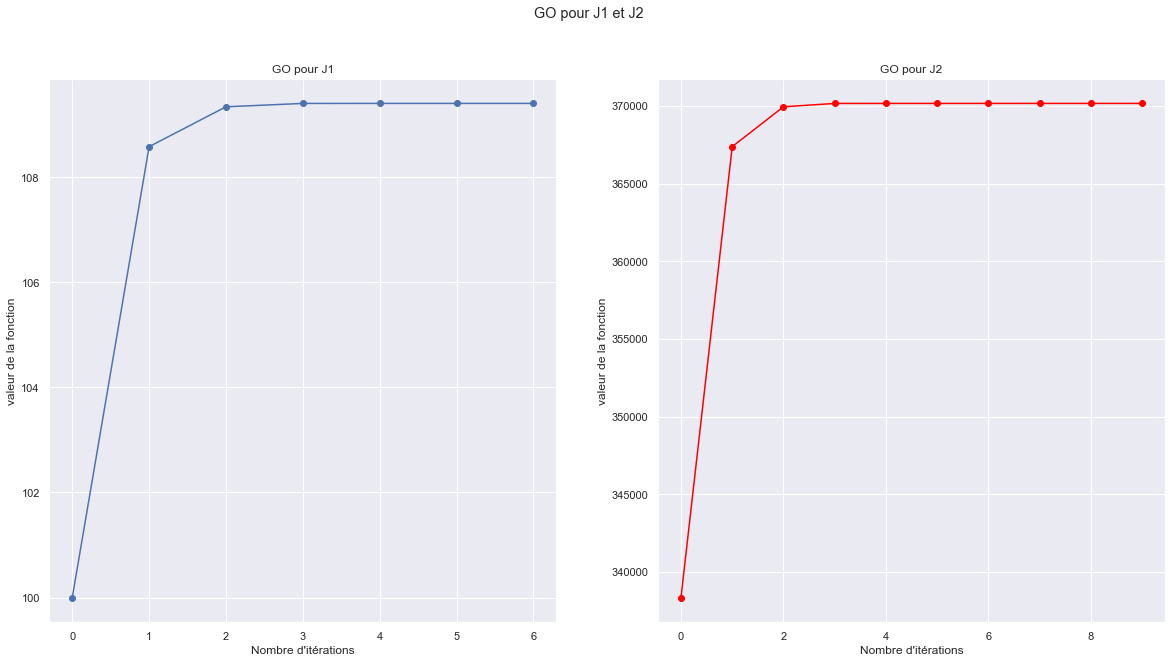

In [32]:
v0 = np.zeros(100)
uk_J1,k_J1 = GO(v0,J1,grad_J1,1e-10,100,0.01)
uk_J2,k_J2 = GO(v0,J2,grad_J2,1e-10,100,0.01)
x_J1=np.linspace(0,k_J1,k_J1+1)
x_J2 = np.linspace(0,k_J2,k_J2+1)
uf_J1 = []
uf_J2 = []
for i in range (k_J1+1):
    uf_J1.append(J1(uk_J1[i]))
for i in range (k_J2+1):
    uf_J2.append(J2(uk_J2[i]))
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(x_J1,uf_J1,marker='o')
plt.xlabel("Nombre d'itérations")
plt.ylabel("valeur de la fonction")
plt.title("GO pour J1")
plt.subplot(1,2,2)
plt.plot(x_J2,uf_J2,color="red",marker="o")
plt.title("GO pour J2")
fig.suptitle("GO pour J1 et J2")
plt.xlabel("Nombre d'itérations")
plt.ylabel("valeur de la fonction")
plt.show()



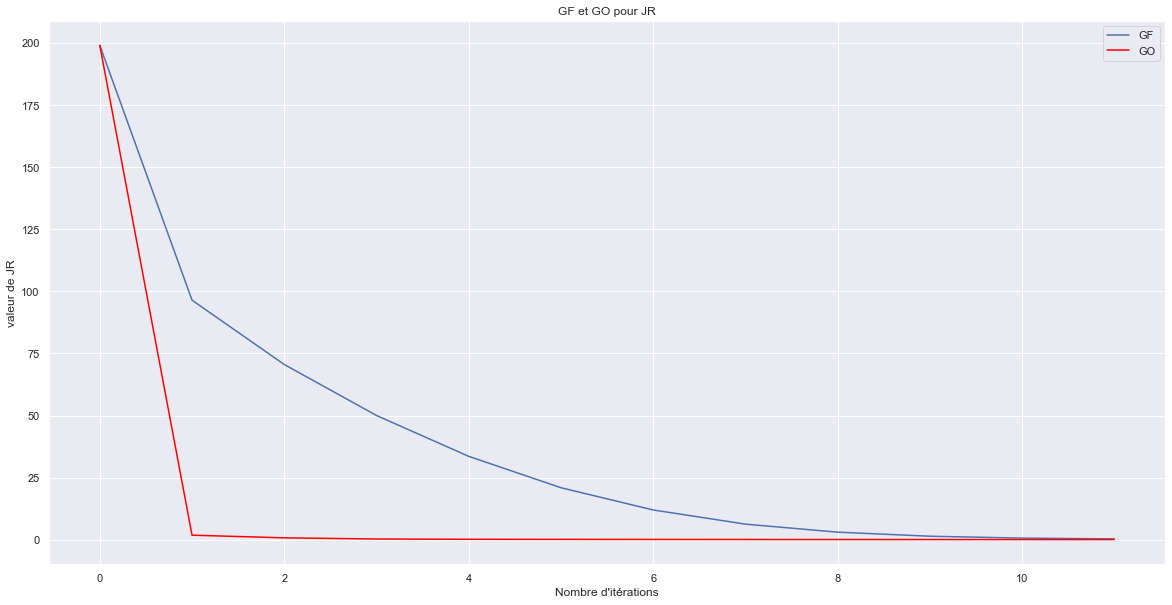

In [34]:

v0 = np.zeros(200)
uk_GF,k_GF = GF(v0,JR,grad_JR,1e-7,10,0.1)
uk_GO,k_GO = GO(v0,JR,grad_JR,1e-7,10,0.5)
x_GF=np.linspace(0,k_GF,k_GF+1)
x_GO = np.linspace(0,k_GO,k_GO+1)
uf_GF = []
uf_GO = []
for i in range (k_GF+1):
    uf_GF.append(JR(uk_GF[i]))
for i in range (k_GO+1):
    uf_GO.append(JR(uk_GO[i]))
fig = plt.figure(figsize=(20,10))
plt.plot(x_GF,uf_GF,label="GF")
plt.plot(x_GO,uf_GO,label="GO",color="red")
plt.title("GF et GO pour JR")
plt.legend()
plt.xlabel("Nombre d'itérations")
plt.ylabel("valeur de JR")
plt.show()



Pour la fonction $J_R$, On voit bien que le gradient à pas optimal converge plus rapidement que le gradient à pas fixe. 

## Etape 5: Etude des méthodes de descente de gradient sur Jh

On définit la fonction $J_h$:
$$J_h(x,y) = (x^2+y-2)^2 + (y^2-2x+1)^2$$
On prend un guess initial $u_0 = (0,0)$ puis $u_0 = (1.5,-1.5)$ et on applique les deux méthodes de descente de gradient sur $J_h$.

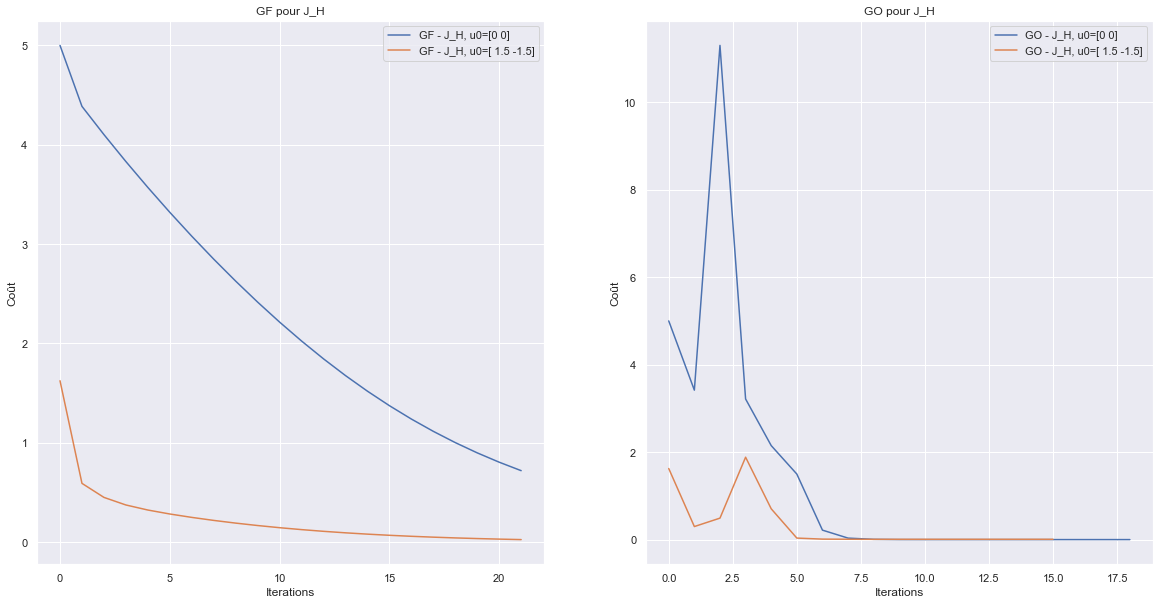

In [58]:
u0 = np.zeros(2)
def J_H(xy):
    x, y = xy
    return (x**2+y-2)**2+(y**2-2*x+1) ** 2

def grad_J_H(xy):
    x, y = xy
    dx = 4*x*(x**2+y-2)-4*(y**2-2*x+1)
    dy = 2*(x**2+y-2)+4*y*(y**2-2*x+1)
    return np.array([dx, dy])

u0_values = [np.array([0, 0]), np.array([1.5, -1.5])]

plt.figure(figsize=(20, 10))
for u0 in u0_values:
    v_opt_GF, k_GF = GF(u0, J_H, grad_J_H, 1e-10, 20, 0.01)
    v_opt_GO, k_GO = GO(u0, J_H, grad_J_H, 1e-10, 200, 0.05)
    uGF_JH = []
    uGO_JH = []
    
    for i in range (k_GF+1):
        uGF_JH.append(J_H(v_opt_GF[i]))
    for i in range (k_GO+1):
        uGO_JH.append(J_H(v_opt_GO[i]))
        
    plt.subplot(1,2,1)
    plt.plot(uGF_JH, label=f"GF - J_H, u0={u0}")
    plt.xlabel("Iterations")
    plt.ylabel("Coût")
    plt.legend()
    plt.title("GF pour J_H")
    plt.subplot(1,2,2)
    plt.plot(uGO_JH, label=f"GO - J_H, u0={u0}")
    plt.xlabel("Iterations")
    plt.ylabel("Coût")
    plt.legend()
    plt.title("GO pour J_H")

plt.show()

En changeant le guess initial $u_0$, on remarque qu'il est possible de converger vers le minimum plus rapidement. En effet, en choisissant la condition intiale $u_0 = (1.5,-1.5)$ qui est plus proche du minimum, on converge plus rapidement vers le minimum.

---

# TP 2 Méthode de gradient conjugué

Dans ce TP, on va implémenter l'algorithme de gradient conjugué et l'appliquer à des fonctions et ainsi la version non-linéaire NLGC avec méthode de Fletcher-Reeves .

## Etape 1: Algorithme GC

On définit d'abord le code pour générer une matrice tridiag et pentadiag de sorte:
$$A=\begin{pmatrix}
2 & -1 & 0 & \cdots & 0 & 0\\
-1 & 2 & -1 & \cdots & 0 & 0\\
0 & -1 & 2 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 2 & -1\\
0 & 0 & 0 & \cdots & -1 & 2
\end{pmatrix}$$

pareille pour B

In [393]:
def tridiag(a,b,c,n):
    A=np.zeros((n,n))
    for i in range(n):
        A[i,i]=b
    for i in range(n-1):
        A[i,i+1]=c
        A[i+1,i]=a
    return A	

A = tridiag(-1,2,-1,3)

def pentadiag(a,b,c,d,e,n):
    A=np.zeros((n,n))
    for i in range(n):
        A[i,i]=b
    for i in range(n-1):
        A[i,i+1]=c
        A[i+1,i]=a
    for i in range(n-2):
        A[i,i+2]=d
        A[i+2,i]=e
    return A


In [485]:
A = tridiag(-1,2,-1,3)
B = pentadiag(-1,4,-1,-1,-1,5)
print("A=",A)
print("B=",B)

A= [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]
B= [[ 4. -1. -1.  0.  0.]
 [-1.  4. -1. -1.  0.]
 [-1. -1.  4. -1. -1.]
 [ 0. -1. -1.  4. -1.]
 [ 0.  0. -1. -1.  4.]]


Rappelons l'algorithme du gradient conjugué GC:
Soit $J$ la fonction cout définie par:
$$\begin{aligned}
  J\colon \mathbb{R}^N & ―――→ \mathbb{R} \\
  v & \longmapsto
  J(v) = \frac{1}{2}<Av,v>-<b,v>+c
\end{aligned}$$

avec $A$ une matrice symétrique définie positive, $b$ un vecteur de $\mathbb{R}^N$ et $c$ un scalaire.

On suppose $$\nabla J(u_0) \neq 0 \text{ et } \nabla J(u_1) \neq 0$$ où
d
$$u_1 = u_0 - t_0 \nabla J(u_0)$$
 et 
$$t_0 = arg\min_{t\gt0} J(u_0 - t \nabla J(u_0))$$

Le gradient conjugué sur $\mathbb{R}$ converge en au plus $N$ itérations.

- *Initialisation*: $k=0$, $u_0$ donné, $d_0 = \nabla J(u_0)\in\mathbb{R}^N$
- *Pour $k=0$ à $N$*:
  - Pas optimal: $t_k = \dfrac{<\nabla J(u_k),d_k>}{<Ad_k,d_k>}$
  - $u_{k+1} = u_k - t_k d_k$
  - $\beta_k = -\dfrac{<\nabla J(u_{k+1}),Ad_k>}{<Ad_k,d_k>}$
  - $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k\hspace{2cm}d_k\text{: direction de descente conjugué}$

In [486]:
def GC (u0,fct,grad,A,eps,n,t0):
    k=0
    U=[u0]
    d0=grad(u0)
    u1=np.copy(u0-t0*d0)
    # A = tridiag(-1,2,-1,len(u0))
    while (k<=n) and (abs(fct(u1)-fct(u0))>eps):
        k+=1
        t0 = (np.dot(grad(u0).T,d0))/(np.dot(np.dot(A,d0.T),d0))
        u0=u1
        u1=np.copy(u0-t0*d0)
        beta=-np.dot(grad(u1).T,np.dot(A,d0))/(np.dot(np.dot(A,d0.T),d0))
        d0=grad(u1)+beta*d0
        U.append(u1)
    return U,k

In [479]:
N= [10,20,40]
print("==== Pour t = 0.5")
for i in N:
    v0=np.zeros(i) 
    u_gc,k_gc = GC(v0,J1,grad_J1,1e-8,100,0.5)
    uf_gc = J1(u_gc[-1])   
    print(f"-N= {i}: GC sur J1, nombre d'itérations = {k_gc}, valeur de J1 = {uf_gc}")

print("---")    
for i in N:
    v0=np.zeros(i)    
    u_gc,k_gc = GC(v0,J2,grad_J2,1e-8,100,0.5)
    uf_gc = J2(u_gc[-1])
    print(f"-N= {i}: GC sur J2, nombre d'itérations = {k_gc}, valeur de J2 = {uf_gc}")


==== Pour t = 0.5
-N= 10: GC sur J1, nombre d'itteration est 0, le minimum est atteint en [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], sa valeur est 0.0
-N= 20: GC sur J1, nombre d'itteration est 0, le minimum est atteint en [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], sa valeur est 0.0
-N= 40: GC sur J1, nombre d'itteration est 0, le minimum est atteint en [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], sa valeur est 0.0
---
-N= 10: GC sur J2, nombre d'itteration est 0, le minimum est atteint en [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], sa valeur est 0.0
-N= 20: GC sur J2, nombre d'itteration est 0, le minimum est atteint en [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.], sa valeur est 0.0
-N= 40: GC sur J2, nombre d'itteration est 0, le minimum est atteint en [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27.

## Etape 2: Minimisation de J3 et J4 

On définit les fonctions $J_3$ et $J_4$:
$$\begin{aligned}
  J_3(v) = \frac{1}{2}<Av,v>-<f,v> & \text{ et } J_4(v) = \frac{1}{2}<Bv,v>-<f,v>
\end{aligned}$$
avec $A=tridiag[-1,2,-1]$ et $B=pentadiag[-1,-1,4,-1,-1]$ et $f=(1,1,..,1)$.

In [37]:
def J3(v):
    n=np.shape(v)[0]
    f=np.ones(n)
    A=tridiag(-1,2,-1,n)
    return 0.5*np.dot(np.dot(A,v),v.T)-np.dot(f,v.T)

def J4(v):
    n=np.shape(v)[0]
    f=np.ones(n)
    A=pentadiag(-1,4,-1,-1,-1,n)
    return 0.5*np.dot(v.T,np.dot(A,v))-np.dot(v.T,f)

In [38]:
def grad_J3(v):
    n=np.shape(v)[0]
    f=np.ones(n)
    A=tridiag(-1,2,-1,n)
    return np.dot(A,v)-f

def grad_J4(v):
    n=np.shape(v)[0]
    f=np.ones(n)
    B=pentadiag(-1,4,-1,-1,-1,n)
    return np.dot(B,v)-f

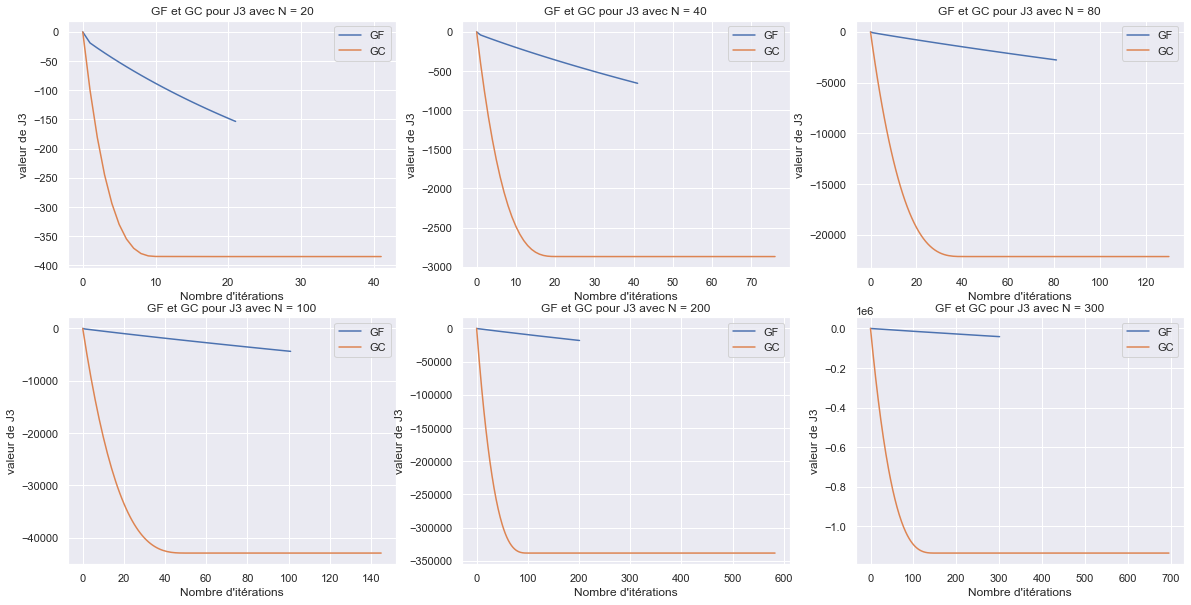

In [496]:
Ns = [20,40,80,100,200,300]
fig = plt.figure(figsize=(20,10))
for n in Ns:
    v0 = np.zeros(n)
    A = tridiag(-1,2,-1,n)
    uk_GF,k_GF = GF(v0,J3,grad_J3,1e-10,1000,0.5)
    uk_GC,k_GC = GC(v0,J3,grad_J3,A,1e-10,1000,0.5)
    x_GF = np.linspace(0,k_GF,k_GF+1)
    x_GC = np.linspace(0,k_GC,k_GC+1)
    uf_GF = []
    uf_GC = []
    for i in range (k_GF+1):
        uf_GF.append(J3(uk_GF[i]))
    for i in range (k_GC+1):
        uf_GC.append(J3(uk_GC[i]))
    plt.subplot(2,3,Ns.index(n)+1)
    plt.plot(uf_GF)
    plt.plot(uf_GC)
    # plt.ylim(-100,500)
    plt.title("GF et GC pour J3 avec N = "+str(n))
    plt.legend(["GF","GC"])
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("valeur de J3")
plt.show()



On remarque que la méthode de gradient conjugué converge plus rapidement que la méthode de descente de gradient à pas fixe. En effet, à partir de dimension N=80, la méthode de gradient à pas fixe ne converge plus alors que la méthode de gradient conjugué converge toujours en itérations moins que la dimension N.

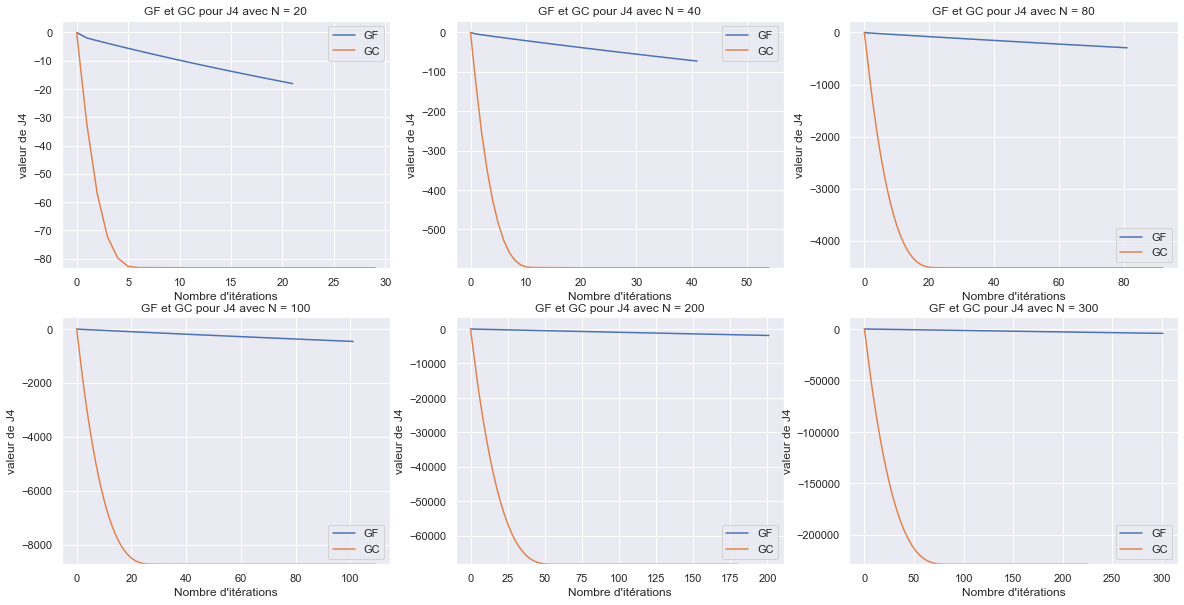

In [492]:
Ns = [20,40,80,100,200,300]
fig = plt.figure(figsize=(20,10))
for n in Ns:
    v0 = np.zeros(n)
    A = pentadiag(-1,4,-1,-1,-1,n)
    uk_GF,k_GF = GF(v0,J4,grad_J4,1e-10,1000,0.05)
    uk_GC,k_GC = GC(v0,J4,grad_J4,A,1e-10,1000,0.5)
    x_GF=np.linspace(0,k_GF,k_GF+1)
    x_GC = np.linspace(0,k_GC,k_GC+1)
    uf_GF = []
    uf_GC = []
    for i in range (k_GF+1):
        uf_GF.append(J4(uk_GF[i]))
    for i in range (k_GC+1):
        uf_GC.append(J4(uk_GC[i]))
    plt.subplot(2,3,Ns.index(n)+1)
    plt.plot(x_GF,uf_GF)
    plt.plot(x_GC,uf_GC)
    plt.ylim(np.min(uf_GC))
    plt.title("GF et GC pour J4 avec N = "+str(n))
    plt.legend(["GF","GC"])
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("valeur de J4")
plt.show()



De meme, La méthode de gradient conjugué converge plus rapidement que la méthode de descente de gradient à pas fixe. l'algortihme GC converge en moins de dimension N itérations alors que la méthode de descente de gradient à pas fixe ne converge pas vers le minimum

## Etape 3: Minimisation de $J_{\epsilon}$

On définit la fonction $J_{\epsilon}$:
$$J_{\epsilon}(v) = \sum_{i=1}^N (v_i)^2 + \dfrac{1}{\epsilon} \sum_{i=1}^{N-1} (v_i + v_{i+1}-N/2)^2$$
avec $\epsilon\gt0$.

In [41]:
def Jeps(v,eps):
    J = 0
    J1=0
    J2 =0
    for i in range(len(v)):
        J1 += v[i]**2
    for i in range(len(v)-1):
        J2 += (v[i]+v[i+1]-len(v)/2)**2
        
    J=J1+1/eps*J2
    return J
def grad_Jeps(v,eps):
    N = len(v)
    grad = np.zeros(N)
    grad[0] = 2*v[0] + (2/eps)*(v[0] + v[1] - N/2)
    for i in range(1, N-1):
        grad[i] = 2*v[i] + (2/eps)*(v[i] + v[i+1] - N/2) + (2/eps)*(v[i] + v[i-1] - N/2)
    grad[N-1] = 2*v[N-1] + (2/eps)*(v[N-1] + v[N-2] - N/2)
    return grad

**Algorithme gradient conjugué non-linéaire (NLGC), méthode de Fletcher-Reeves**
- *Initialisation*: $k=0$, $u_0$ donné, $d_0 = \nabla J(u_0)\in\mathbb{R}^N$
- *while $||d_k||\gt\epsilon d_0$*:
  - Pas optimal: $t_k$ par recherche linéaire. On cherche $t_k$ tel que $J(u_k - t_k d_k)$ soit minimal. (approximation par une parabole)
  - $u_{k+1} = u_k - t_k d_k$
  - $\beta_k = \dfrac{<\nabla J(u_{k+1}),\nabla J(u_{k+1})>}{<\nabla J(u_k),\nabla J(u_k) >} \hspace{2cm}\text{(Méthode de Fletcher-Reeves)}$
  - $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k\hspace{2cm}d_k\text{: direction de descente conjugué}$

In [505]:
def NLGC(u0,fct,grad,eps,n,t0,ddd=False):
    # # Fletcher-Reeves
    try:
        u = u0.copy()
        U=[u]
        g = grad(u,eps)
        d = -g
        t = t0
        k = 0
        while np.linalg.norm(g) > eps and k < n:
            # Compute step size using backtracking line search

            while fct(u + t*d,eps) > fct(u,eps) + 0.5*t*np.dot(g, d):
                t = 0.5*t
            u_new = u + t*d
            g_new = grad(u_new,eps)
            beta = np.dot(g_new, g_new) / np.linalg.norm(g)**2
            d_new = -g_new + beta*d
            u = u_new
            g = g_new
            d = d_new
            k += 1
            t = t0
            U.append(u)
    except:
        u = u0.copy()
        U=[u]
        g = grad(u)
        d = -g
        t = t0
        k = 0
        while np.linalg.norm(g) > eps and k < n:
            # Compute step size using backtracking line search
            while fct(u + t*d) > fct(u) + 0.5*t*np.dot(g, d):
                t = 0.5*t
            u_new = u + t*d
            g_new = grad(u_new)
            beta = np.dot(g_new, g_new) / np.linalg.norm(g)**2
            d_new = -g_new + beta*d
            u = u_new
            g = g_new
            d = d_new
            k += 1
            t = t0
            U.append(u)
    return U,k

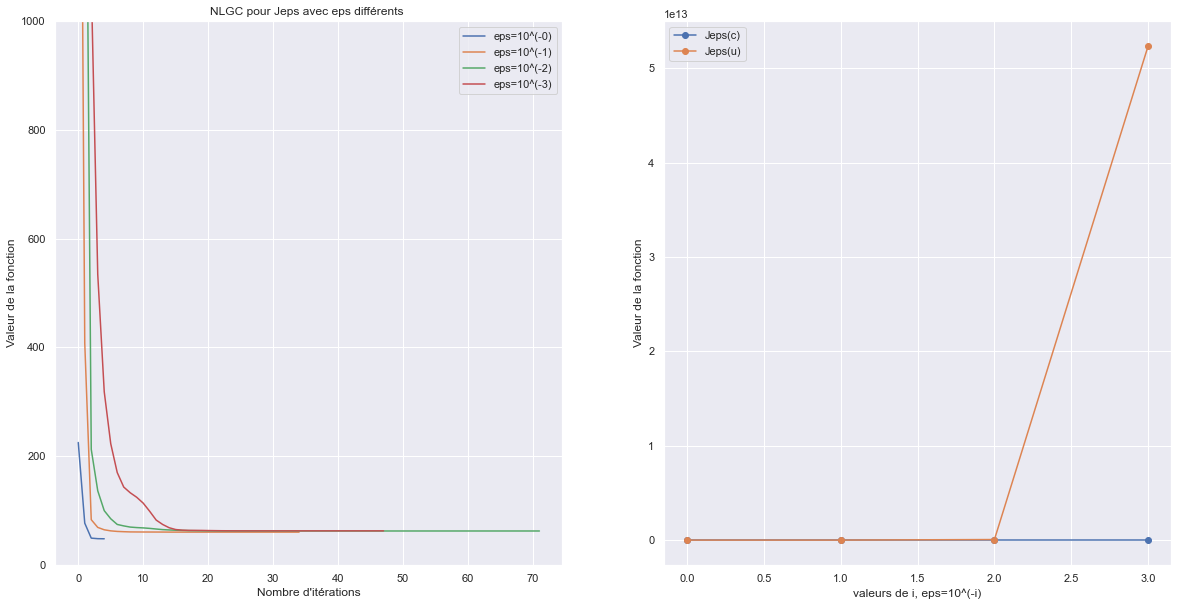

In [522]:
p=[0,1,2,3]
itt = 1000
v0 = np.zeros(10)
c = [N/4 for i in range(N)]
Jeps_u = []
Jeps_c = []
grad_Jeps_u = []
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
for j in p:
    uk_NLGC,k_NLGC = NLGC(v0,Jeps,grad_Jeps,10**(-j),itt,0.5)
    x_GF=np.linspace(0,k_NLGC,k_NLGC+1)
    uf_NLGC = []
    for i in range (k_NLGC+1):
        uf_NLGC.append(Jeps(uk_NLGC[i],10**(-j)))
    plt.plot(x_GF,uf_NLGC,label=f"eps=10^(-{j})")
    # plt.show()
    Jeps_u.append(Jeps(uf_NLGC,10**(-j)))
    # print(grad_Jeps(uf_NLGC,10**(-j)))
    grad_Jeps_u.append(grad_Jeps(uf_NLGC,10**(-j)))
    Jeps_c.append(Jeps(c,10**(-j)))
    # plt.ylim(-50,500)
plt.title(f"NLGC pour Jeps avec eps différents ")
plt.xlabel("Nombre d'itérations")
plt.ylim(0,10**3)
plt.legend()
plt.ylabel("Valeur de la fonction")





plt.subplot(1,2,2)
# plt.plot(p,Jeps_u,marker='o',label="Jeps")
# plt.plot(grad_Jeps_u[-1],marker='o',label="grad Jeps")
# plt.ylim(0,1000)
plt.plot(Jeps_c,marker='o',label="Jeps(c)")
plt.plot(Jeps_u,marker='o',label="Jeps(u)")
plt.legend()
# plt.plot(Jeps(c,10**(-3)))
plt.xlabel("valeurs de i, eps=10^(-i)")
plt.ylabel("Valeur de la fonction")
plt.show()

----

# TP 3: Méthode de gradient à pas spectral

Pour ce TP, on va implémenter l'algorithme de gradient à pas spectral et l'appliquer à des fonctions et le comparer à la version non-linéaire NLGC.

## Etape 1: Algorithme de gradient à pas spectral BB1 et BB2

On introduit les notations suivantes:
$$\begin{cases}
  s_{k-1} = u_k - u_{k-1} \\
  y_{k-1} = \nabla J(u_k) - \nabla J(u_{k-1})
\end{cases}$$

Nous allons définir nos fonctions de descente de gradient à pas spectral dit de Barzilai et Borwein. Pour cela, on s’inspire du même algorithme donné par un pas constant:
$$u_0 \text{ donné;}\hspace{2cm}u_k+1 = u_k-\rho_k \nabla J(u_k)$$
On modifie cet algorithme en remplaçant le pas $\rho_k$ par un pas spectral $\rho_k^1$ ou $\rho_k^2$ selon la méthode BB1 ou BB2.
$$\rho_k^1 = \dfrac{(s_{k-1},s_{k-1})}{(y_{k-1},s_{k-1})} \text{ et } \rho_k^2 = \dfrac{(s_{k-1},y_{k-1})}{(y_{k-1},y_{k-1})}$$

In [283]:
def BB1(u0,fct,grad,eps,n,rho):
    u = u0 - rho*grad(u0) # Calcul du u(1)
    s = u-u0 # Calcul de s(1)
    y = grad(u)-grad(u0) # Calcul de y(1)
    
    err=1
    i = 0
    U = np.zeros(n)
    U = [u0]
    k=0
    while(err>eps):
        
        uprec=np.copy(u)
        rho = np.dot(s.T,s)/np.dot(y.T,s)
        u = uprec - rho*grad(uprec)
        s = u - uprec
        y =  grad(u)-grad(uprec)
        k=k+1
        err = np.linalg.norm(grad(u))
        U.append(u)
        
    return U,k

In [282]:
def BB2(u0,fct,grad,eps,n,rho):
    u = u0 - rho*grad(u0) # Calcul du u(1)
    s = u-u0 # Calcul de s(1)
    y = grad(u)-grad(u0) # Calcul de y(1)
    
    err=1
    i = 0
    U = np.zeros(n)
    U = [u0]
    k=0
    while(err>eps):
        
        uprec=np.copy(u)
        rho = np.dot(s.T,y)/np.dot(y.T,y)
        u = uprec - rho*grad(uprec)
        s = u - uprec
        y =  grad(u)-grad(uprec)
        k=k+1
        err = np.linalg.norm(grad(u))
        U.append(u)
        
    return U,k

## Etape 2: Tests de validation sur J1 et J2

In [284]:
v0=np.zeros(N)
print("--> Tests de l'algorithme BB1")
u1,k1 = BB1(v0,J1,grad_J1,10**-3,1000,0.5)
u2,k2 = BB1(v0,J2,grad_J2,10**-3,1000,0.5)
print("Nombre d'itérations pour J1 : ",k1,"le minimum est atteint en ",u1[-1],"et la valeur de la fonction est ",J1(u1[-1]))
print("Nombre d'itérations pour J2 : ",k2,"le minimum est atteint en ",u2[-1],"et la valeur de la fonction est ",J2(u2[-1]))
print("--> Tests de l'algorithme BB2")
u3,k3 = BB2(v0,J1,grad_J1,10**-3,1000,0.5)
u4,k4 = BB2(v0,J2,grad_J2,10**-3,1000,0.5)
print("Nombre d'itérations pour J1 : ",k3,"le minimum est atteint en ",u3[-1],"et la valeur de la fonction est ",J1(u3[-1]))
print("Nombre d'itérations pour J2 : ",k4,"le minimum est atteint en ",u4[-1],"et la valeur de la fonction est ",J2(u4[-1]))




--> Tests de l'algorithme BB1
Nombre d'itérations pour J1 :  1 le minimum est atteint en  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] et la valeur de la fonction est  0.0
Nombre d'itérations pour J2 :  1 le minimum est atteint en  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] et la valeur de la fonction est  0.0
--> Tests de l'algorithme BB2
Nombre d'itérations pour J1 :  1 le minimum est atteint en  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] et la valeur de la fonction est  0.0
Nombre d'itérations pour J2 :  1 le minimum est atteint en  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] et la valeur de la fonction est  0.0


On trouve que pour les deux fonctions J1 et J2, on trouve leurs minimum en une seule itération. puisque ce sont des fonctions positives qui s'annulent en 0. les algorithmes de gradient à pas spectral BB1 et BB2 sont donc bien implémentés.

## Etape 3: Minimisation de J5, J6 et la fonction de Rosenbrock $J_R$

On définit les fonctions $J_5$, $J_6$ et $J_R$ et leurs gradients:
$$J_5(v) = \dfrac{1}{2}(Av,v)-(f,v)+\sum_{i=1}^{N}(v_i)^2$$
$$J_6(v) = \dfrac{1}{2}(Av,v)-(f,v)+\sum_{i=1}^{N}(v_i)^4$$
$$J_R(v) = \sum_{i=1}^{N-1} (v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i-1)^2$$

In [275]:
def J5(v):
    N = np.shape(v)[0]
    A = tridiag(-1,2,-1,N)
    f=np.ones(N)
    J = 0
    J=0.5*np.dot(np.dot(A,v).T,v)-np.dot(f.T,v) 
    s = 0
    for i in range(0,N):
        s+=v[i]**2
    J = J+s
    return J
def grad_J5(v):
    N = np.shape(v)[0]
    A = tridiag(-1,2,-1,N)
    f=np.ones(N)
    J = np.dot(A,v) - f
    s=np.zeros(N)
    for i in range(0,N):
        s[i] = 2*v[i]
    J = J+s
    return J

    

In [274]:
def J6(v):
    N = np.shape(v)[0]
    A = tridiag(-1,2,-1,N)
    f=np.ones(N)
    J=0.5*np.dot(np.dot(A,v).T,v)-np.dot(f.T,v)
    s = 0
    for i in range(0,N):
        s+=v[i]**4
    J = J+s
    return J
def grad_J6(v):
    N = np.shape(v)[0]
    A = tridiag(-1,2,-1,N)
    f=np.ones(N)
    J = 0.5*np.dot((A.T+A),v) - f
    s=np.zeros(N)
    for i in range(0,N):
        s[i] = 4*v[i]**3
    J = J+s
    return J

    

In [276]:
def JR(x) : 
    N = np.shape(x)[0]
    J = 0
    for i in range(0,N-1):
        J += (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return J

def JRgradient(v):
    N = np.shape(v)[0]
    J = np.zeros(N)
    J[0] = -4*v[0]*(v[1]-v[0]**2) + 2*(v[0]-1)
    J[N-1] = 2*(v[N-1]-v[N-2]**2)
    for i in range(0,N-1):
        J[i] = -4*v[i]*(v[i+1]-v[i]**2) + 2*(v[i]-1) + 2*(v[i] - v[i-1]**2)
    return J 

On applique les méthodes de gradient à pas spectral BB1 et BB2 sur les fonctions $J_5$, $J_6$ et $J_R$ 

Pour la fonction J5 : 


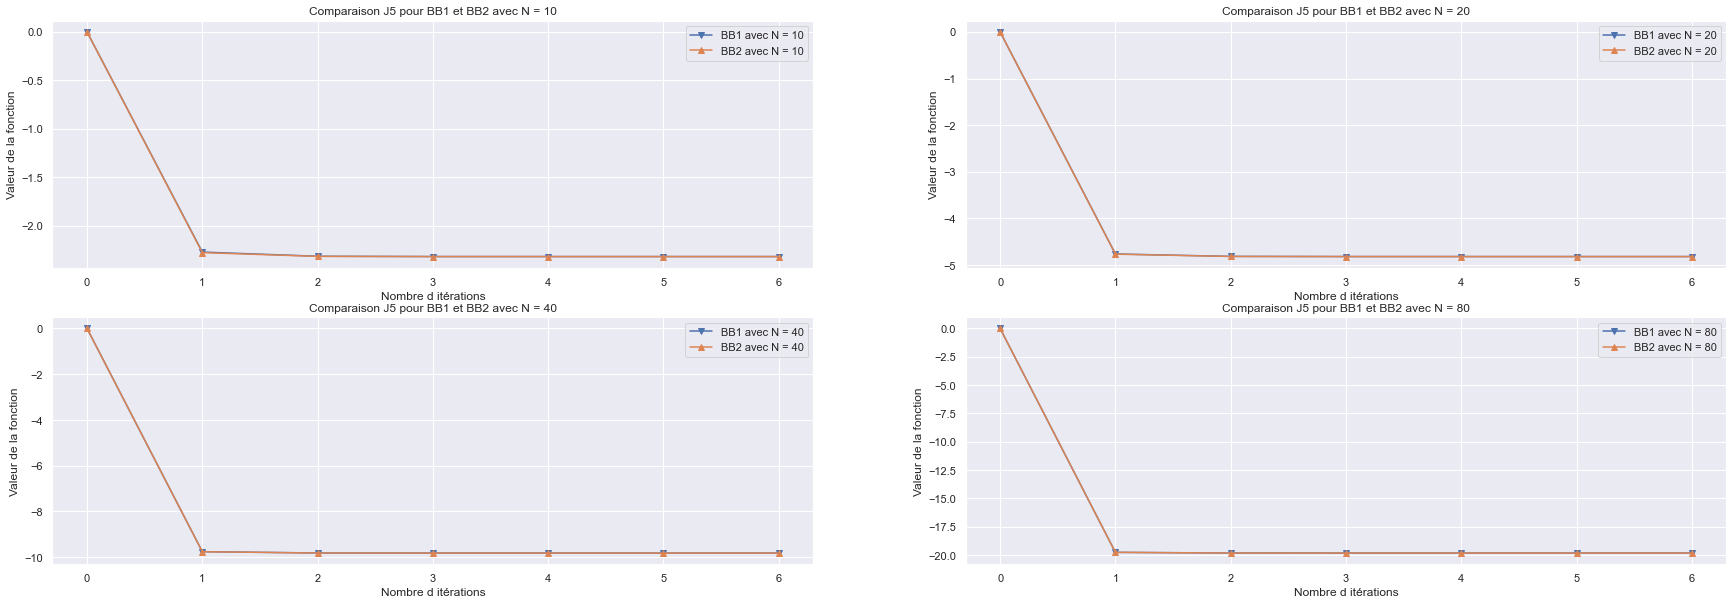

Pour la fonction J6 : 


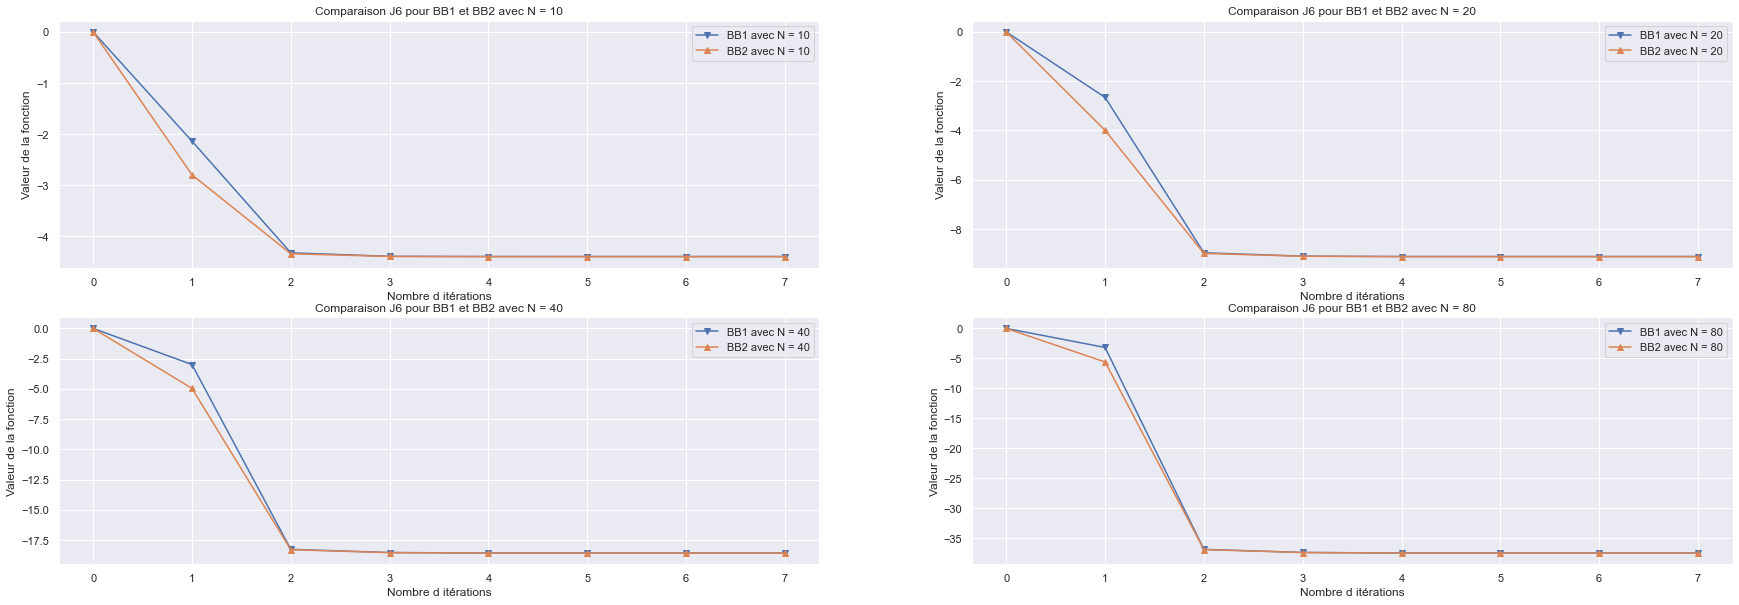

Pour la fonction JR : 


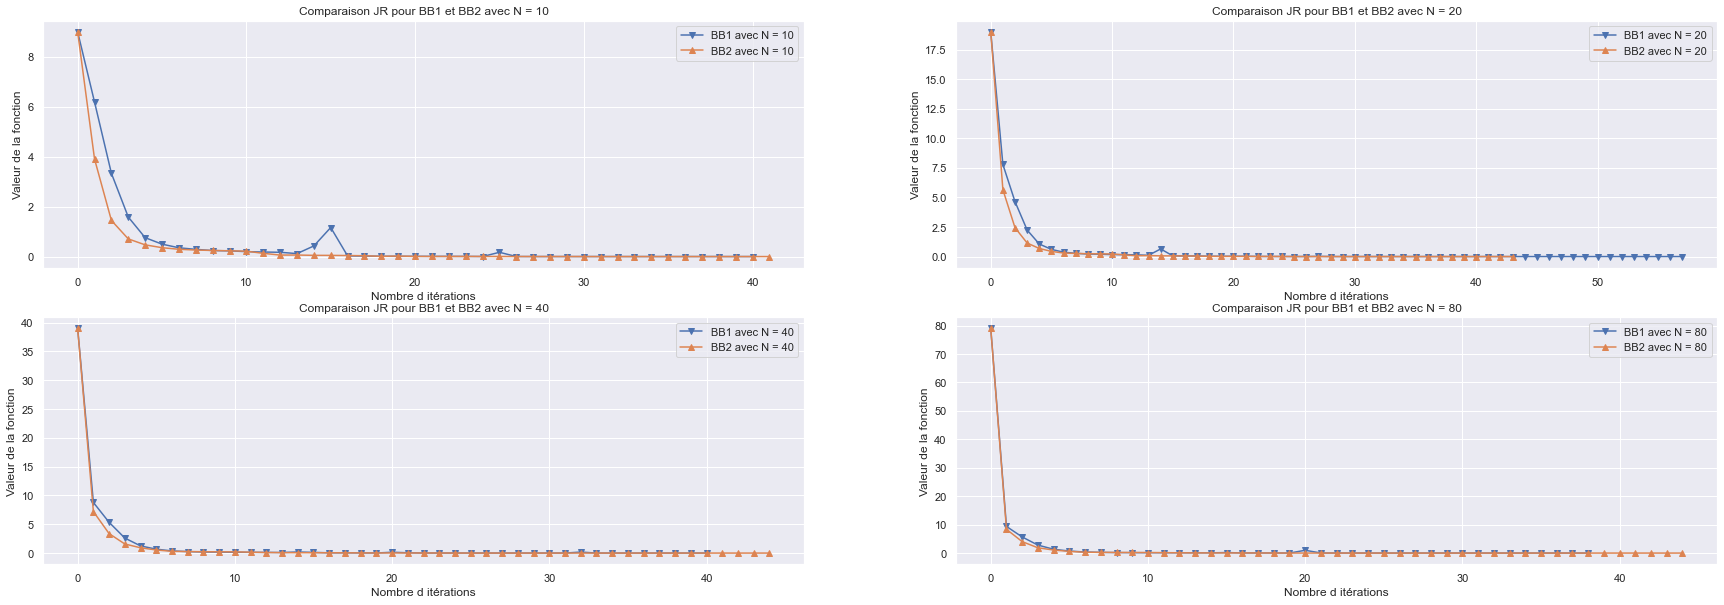

In [343]:
Ns =[10,20,40,80]

BB1_J5 = []
BB2_J5 = []
BB1_J6 = []
BB2_J6 = []
BB1_JR = []
BB2_JR = []

for N in Ns:
    v0 = np.zeros(N)
    
    uBB1_J5,kBB1_J5 = BB1(v0,J5,grad_J5,10**-3,1000,0.5)
    uBB2_J5,kBB2_J5 = BB2(v0,J5,grad_J5,10**-3,1000,0.5)
    uBB1_J6,kBB1_J6 = BB1(v0,J6,grad_J6,10**-3,1000,0.5)
    uBB2_J6,kBB2_J6 = BB2(v0,J6,grad_J6,10**-3,1000,0.5)
    uBB1_JR,kBB1_JR = BB1(v0,JR,JRgradient,10**-3,1000,0.5)
    uBB2_JR,kBB2_JR = BB2(v0,JR,JRgradient,10**-3,1000,0.5)

    ufBB1_J5 = []
    ufBB1_J6 = []
    ufBB1_JR = []
    ufBB2_J5 = []
    ufBB2_J6 = []
    ufBB2_JR = []

    
    for i in range(len(uBB1_J5)):
        ufBB1_J5 += [J5(uBB1_J5[i])]
    for i in range(len(uBB1_J6)):
        ufBB1_J6 += [J6(uBB1_J6[i])]
    for i in range(len(uBB1_JR)):
        ufBB1_JR += [JR(uBB1_JR[i])]
    for i in range(len(uBB2_J5)):
        ufBB2_J5 += [J5(uBB2_J5[i])]
    for i in range(len(uBB2_J6)):
        ufBB2_J6 += [J6(uBB2_J6[i])]
    for i in range(len(uBB2_JR)):
        ufBB2_JR += [JR(uBB2_JR[i])]

    BB1_J5 += [ufBB1_J5]
    BB2_J5 += [ufBB2_J5]
    BB1_J6 += [ufBB1_J6]
    BB2_J6 += [ufBB2_J6]
    BB1_JR += [ufBB1_JR]
    BB2_JR += [ufBB2_JR]
    

print("Pour la fonction J5 : ")
plt.figure(figsize=(30,10))
for i in range(len(BB1_J5)):
    plt.subplot(2,2,i+1)
    plt.plot(BB1_J5[i],label=f'BB1 avec N = {Ns[i]}',marker='v')
    plt.plot(BB2_J5[i],label=f'BB2 avec N = {Ns[i]}',marker='^')
    plt.ylabel('Valeur de la fonction')
    plt.xlabel('Nombre d itérations')
    plt.title(f'Comparaison J5 pour BB1 et BB2 avec N = {Ns[i]}')
    plt.legend()
plt.show()
    
print("Pour la fonction J6 : ")
plt.figure(figsize=(30,10))
for i in range(len(BB1_J6)):
    plt.subplot(2,2,i+1)
    plt.plot(BB1_J6[i],label=f'BB1 avec N = {Ns[i]}',marker='v')
    plt.plot(BB2_J6[i],label=f'BB2 avec N = {Ns[i]}',marker='^')
    plt.ylabel('Valeur de la fonction')
    plt.xlabel('Nombre d itérations')
    plt.title(f'Comparaison J6 pour BB1 et BB2 avec N = {Ns[i]}')
    plt.legend()
plt.show()
    
print("Pour la fonction JR : ")
plt.figure(figsize=(30,10))
for i in range(len(BB1_JR)):
    plt.subplot(2,2,i+1)
    plt.plot(BB1_JR[i],label=f'BB1 avec N = {Ns[i]}',marker='v')
    plt.plot(BB2_JR[i],label=f'BB2 avec N = {Ns[i]}',marker='^')
    plt.ylabel('Valeur de la fonction')
    plt.xlabel('Nombre d itérations')
    plt.title(f'Comparaison JR pour BB1 et BB2 avec N = {Ns[i]}')
    plt.legend()
plt.show()
    





On voit que pour les fonctions J5 et J6, les algorithmes de gradient BB1 et BB2 sont presque identiques. En effet, ils convergent en 2 itérations et donnent des résultats très proches.

Pour la fonction de Rosenbrock, on remarque que l'algorithme BB2 converge plus rapidement que l'algorithme BB1.

## Etape 4: Comparaison des méthodes de gradient NLGC, BB1 et BB2 sur $J_H$ et $J_R$

On Rappelle la fonction $J_H$ 

In [357]:
def JH(u):
    JH = (u[0]**2+u[1]-2)**2+(u[1]**2-2*u[0]+1)**2
    return JH

def grad_JH(v):
    grad_JH = np.zeros(2)
    grad_JH[0] = 4*v[0]*(v[0]**2+v[1]-2)-4*(v[1]**2-2*v[0]+1)
    grad_JH[1] = 2*(v[0]**2+v[1]-2)+4*v[1]*(v[1]**2-2*v[0]+1)
    return grad_JH

Pour la fonction JH : 


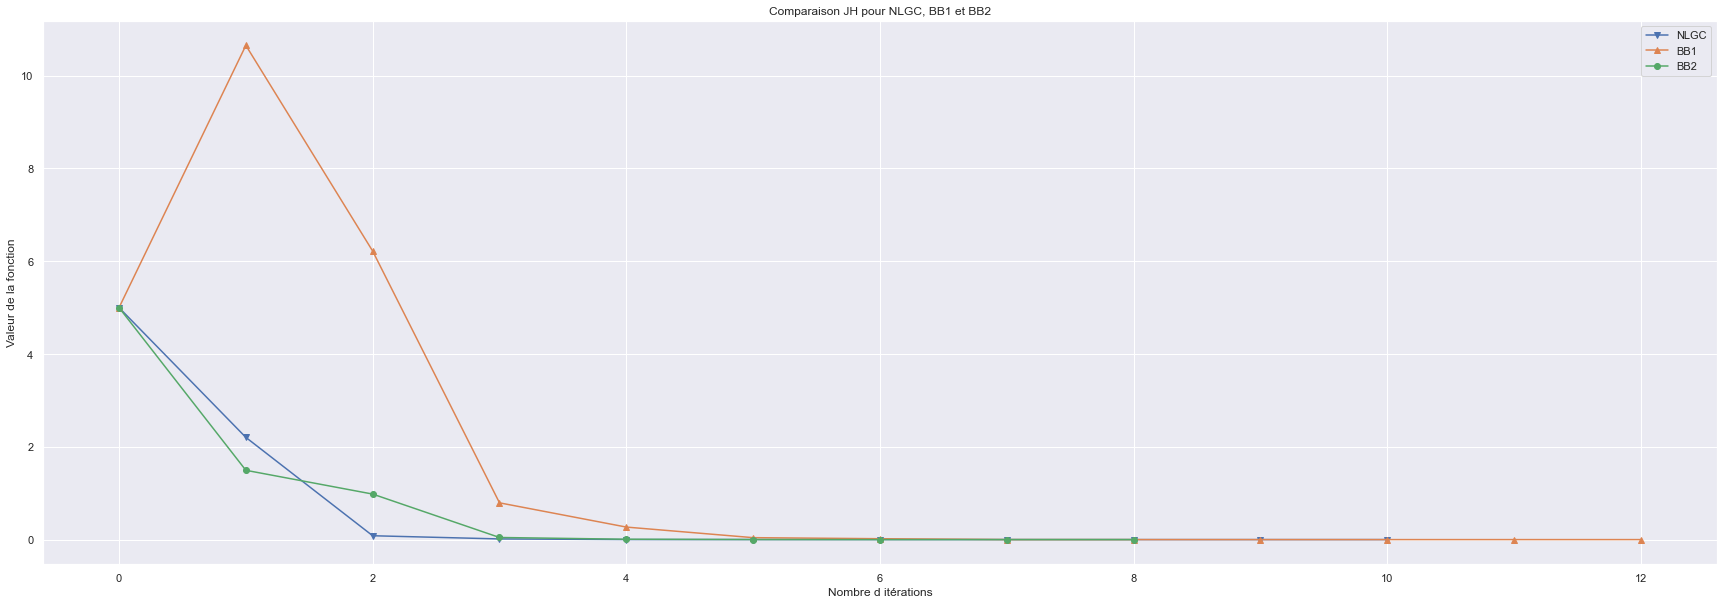

Pour la fonction JR : 


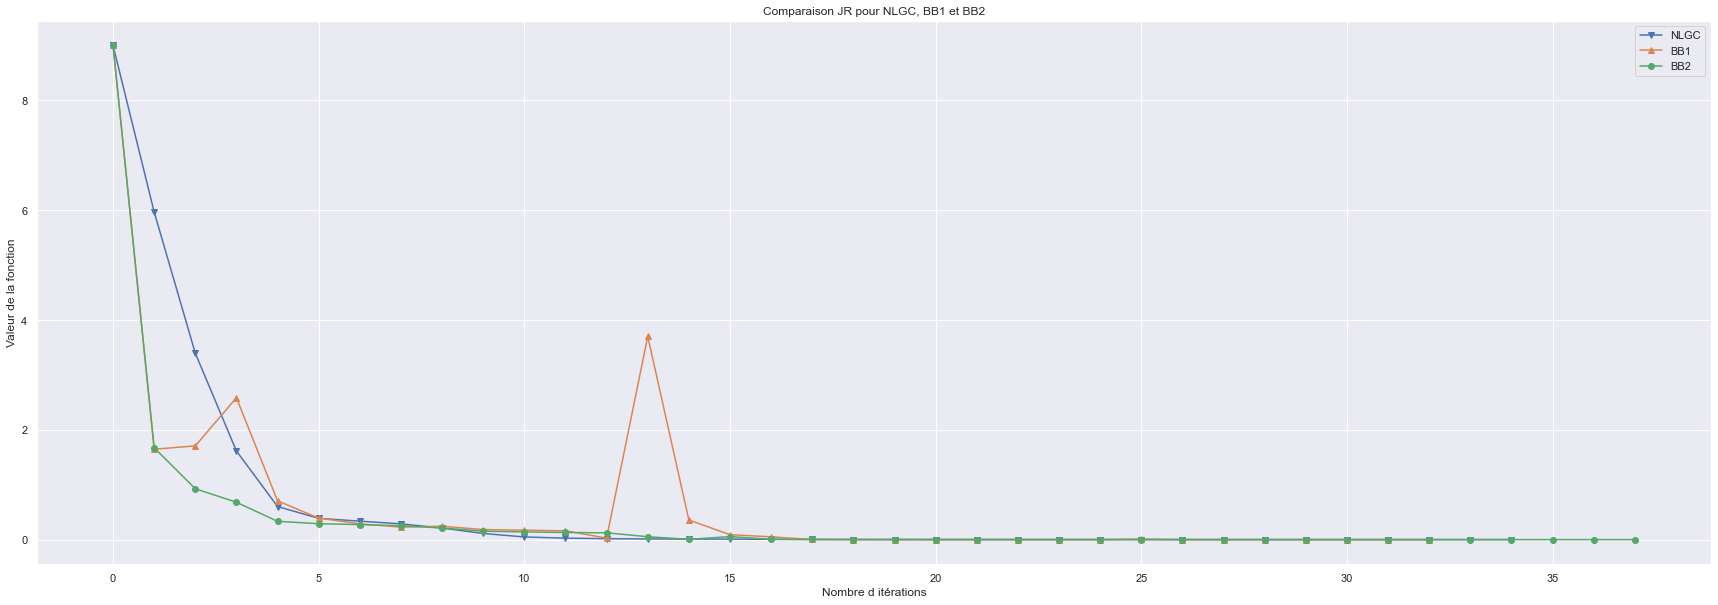

In [523]:
v0 = np.zeros(2)
uNLGC_JH,kNLGC_JH = NLGC(v0,JH,grad_JH,10**-3,1000,0.1)
uBB1_JH,kBB1_JH = BB1(v0,JH,grad_JH,10**-3,1000,0.1)
uBB2_JH,kBB2_JH = BB2(v0,JH,grad_JH,10**-3,1000,0.1)
v0 = np.zeros(10)
uNLGC_JR,kNLGC_JR = NLGC(v0,JR,JRgradient,10**-3,1000,0.1)
uBB1_JR,kBB1_JR = BB1(v0,JR,JRgradient,10**-3,1000,0.1)
uBB2_JR,kBB2_JR = BB2(v0,JR,JRgradient,10**-3,1000,0.1)

ufNLGC_JH = []
ufBB1_JH = []
ufBB2_JH = []
ufNLGC_JR = []
ufBB1_JR = []
ufBB2_JR = []

for i in range(len(uNLGC_JH)):
    ufNLGC_JH += [JH(uNLGC_JH[i])]
for i in range(len(uBB1_JH)):
    ufBB1_JH += [JH(uBB1_JH[i])]
for i in range(len(uBB2_JH)):
    ufBB2_JH += [JH(uBB2_JH[i])]
for i in range(len(uNLGC_JR)):
    ufNLGC_JR += [JR(uNLGC_JR[i])]
for i in range(len(uBB1_JR)):
    ufBB1_JR += [JR(uBB1_JR[i])]
for i in range(len(uBB2_JR)):
    ufBB2_JR += [JR(uBB2_JR[i])]
    
    
print("Pour la fonction JH : ")
plt.figure(figsize=(30,10))
plt.plot(ufNLGC_JH,label=f'NLGC',marker='v')
plt.plot(ufBB1_JH,label=f'BB1',marker='^')
plt.plot(ufBB2_JH,label=f'BB2',marker='o')
plt.ylabel('Valeur de la fonction')
plt.xlabel('Nombre d itérations')
plt.title(f'Comparaison JH pour NLGC, BB1 et BB2')
plt.legend()
plt.show()

print("Pour la fonction JR : ")
plt.figure(figsize=(30,10))
plt.plot(ufNLGC_JR,label=f'NLGC',marker='v')
plt.plot(ufBB1_JR,label=f'BB1',marker='^')
plt.plot(ufBB2_JR,label=f'BB2',marker='o')
plt.ylabel('Valeur de la fonction')
plt.xlabel('Nombre d itérations')
plt.title(f'Comparaison JR pour NLGC, BB1 et BB2')
plt.legend()
plt.show()

On voit vien que la méthode BB2 reste toujours la methode la plus rapide pour converger vers le minimum de $J_H$ et $J_R$.